# Lab Eight for UW AMATH 563
## Assignment: Clustering and Classification of Credit Card Users
## By Rebecca Lopez

In [2]:
#Import Necessary Packages & Libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#Comment out lines below if not using google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Import dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/CC GENERAL.csv')
df.head()
df = df.drop(['CUST_ID'], axis=1)

In [5]:
#Normalize each dimension of the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df = df.dropna()

#Split into train set (8000) and test set (1000)
index = np.trunc(0.8*df.shape[0]).astype('int')
X_train = df[:index]
X_test = df[index:]

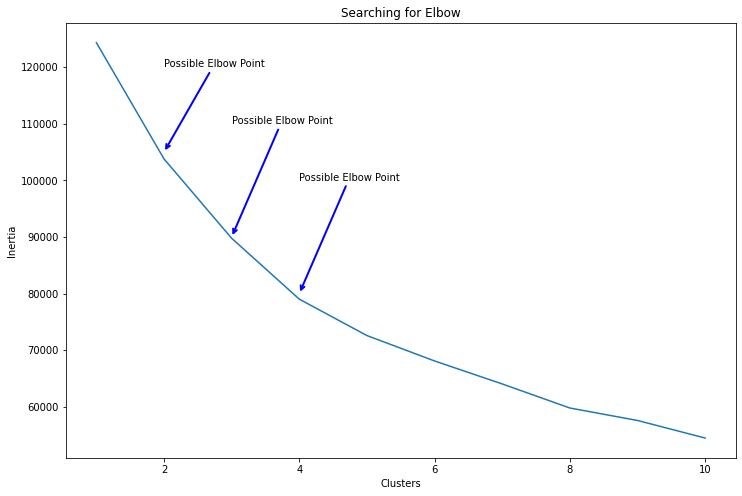

In [6]:
# Use k-means clustering to separate the customers into k groups
from sklearn.cluster import KMeans
clusters = []

for i in range(1, 11):
    km = KMeans(n_clusters=i,max_iter=300).fit(X_train)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 80000), xytext=(4, 100000), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible Elbow Point', xy=(3, 90000), xytext=(3, 110000), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
ax.annotate('Possible Elbow Point', xy=(2, 105000), xytext=(2, 120000), xycoords='data', arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

In [7]:
#Pairplots to identify any possible clustering features
# sns.pairplot(df, aspect=1.5)
# plt.show()

In [ ]:
#Number of Clusters
num_clus=3

X_train_km=X_train.copy()

#Use k-means clustering to separate the customers into k groups
km4 = KMeans(n_clusters=num_clus,max_iter=1000).fit(X_train_km)
centers = np.array(km4.cluster_centers_)

X_train_km['Labels'] = km4.labels_

In [ ]:
#Produce plot of clusters with cluster centers for balance as a function of cash advance
plt.figure(1,figsize=(12, 8))
sns.scatterplot(X_train_km['BALANCE'], X_train_km['CASH_ADVANCE'], hue=X_train_km['Labels'], palette=sns.color_palette('hls',num_clus))
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.title('KMeans with {} Clusters On Orginal Train Data Set'.format(num_clus))
plt.show()

In [ ]:
#Produce plot of clusters with cluster centers for balance as a function of purchase frequency
plt.figure(2,figsize=(12, 8))
sns.scatterplot(X_train_km['BALANCE'], X_train_km['PURCHASES_FREQUENCY'], hue=X_train_km['Labels'], palette=sns.color_palette('hls',num_clus))
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.title('KMeans with {} Clusters On Orginal Train Data Set'.format(num_clus))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


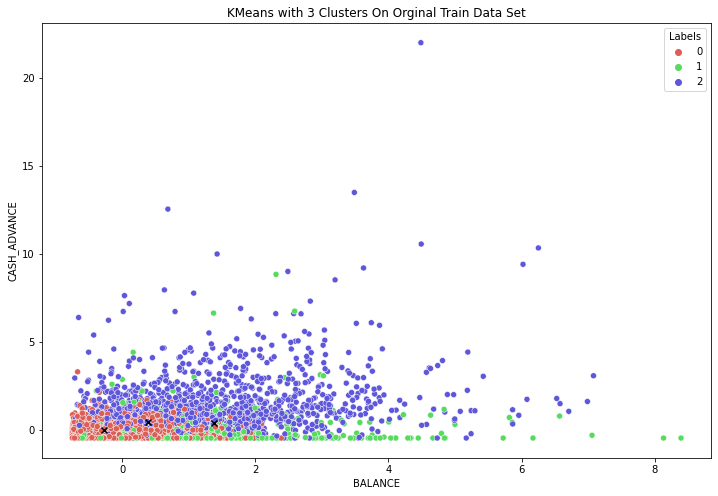

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


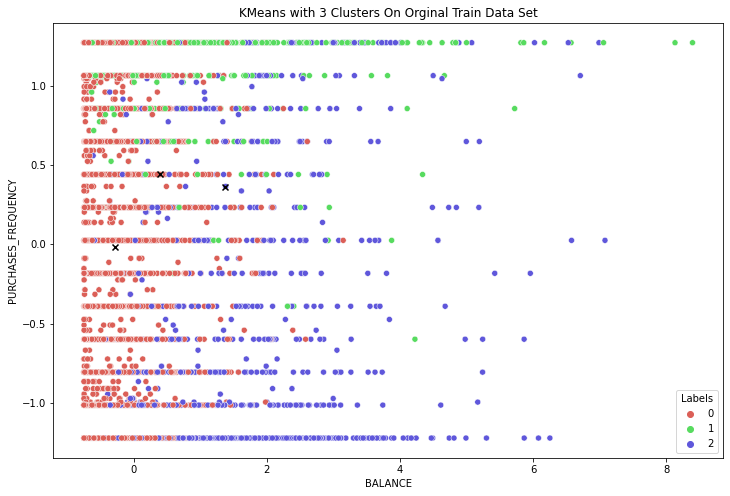

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


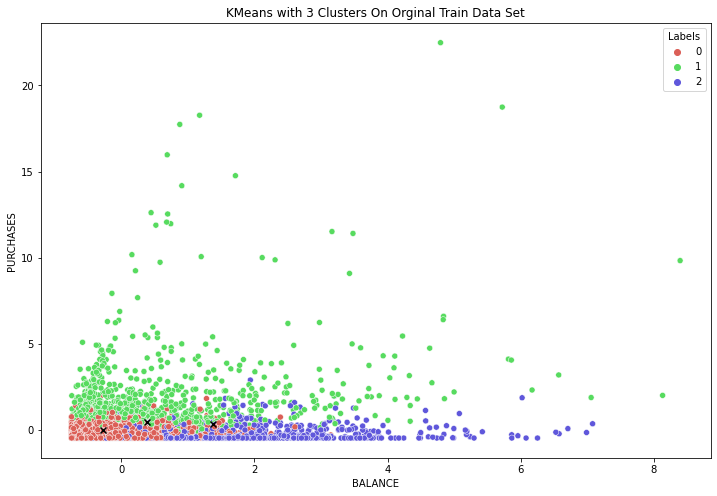

In [8]:
#Produce plot of clusters with cluster centers for balance as a function of purchase amount
plt.figure(3,figsize=(12, 8))
sns.scatterplot(X_train_km['BALANCE'], X_train_km['PURCHASES'], hue=X_train_km['Labels'], palette=sns.color_palette('hls',num_clus))
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
plt.title('KMeans with {} Clusters On Orginal Train Data Set'.format(num_clus))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


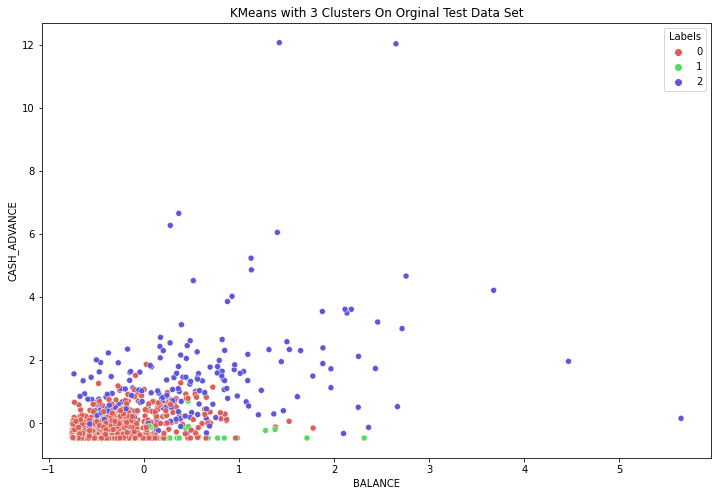

In [9]:
#Predict Unaltered Testing Data with Model
labels=km4.predict(X_test)

X_test_km=pd.DataFrame(X_test.copy(), columns=X_test.columns)
X_test_km['Labels'] = labels
plt.figure(figsize=(12, 8))
sns.scatterplot(X_test_km['BALANCE'], X_test_km['CASH_ADVANCE'], hue=X_test_km['Labels'], palette=sns.color_palette('hls', num_clus))
plt.title('KMeans with {} Clusters On Orginal Test Data Set'.format(num_clus))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


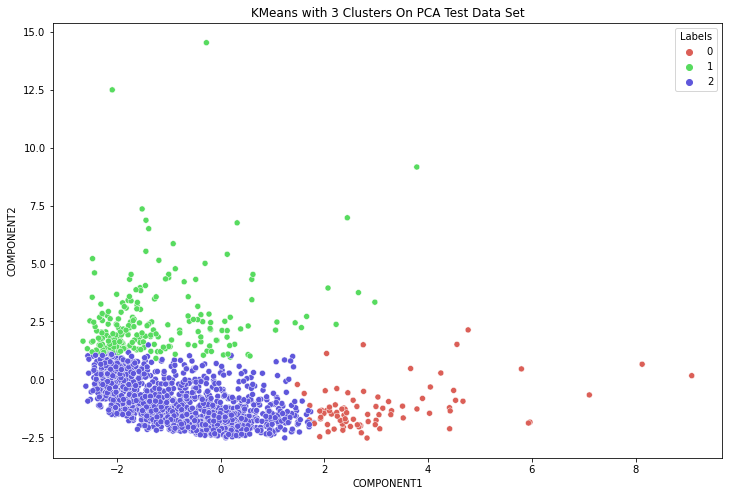

In [10]:
#Take the PCA and SVD Decompositions of your training data and take the r-dimensional (choose r <=5) projection in these spaces.

#PCA Decompositions of Training Data
from sklearn.decomposition import PCA

#Low-dimensional Reconstruction
rd = 5 #Number of (reduced) dimensions to use

#Transform Training Data
pca = PCA(n_components=rd)
X_PCA = pca.fit(X_train.copy())
X_PCA_train = X_PCA.transform(X_train.copy())

#Transform Testing Data and Centroids
# Predict with models
X_PCA_test = pca.transform(X_test.copy())
PCA_clusters = pca.transform(km4.cluster_centers_)

kmeans_pca = KMeans(n_clusters=num_clus,max_iter=1000)
kmeans_pca.fit(PCA_clusters)
kmeans_pca.cluster_centers_
labels=kmeans_pca.predict(X_PCA_test)

X_PCA_test_km=pd.DataFrame(X_PCA_test, columns=['COMPONENT1','COMPONENT2','COMPONENT3','COMPONENT4','COMPONENT5'])
X_PCA_test_km['Labels'] = labels

plt.figure(figsize=(12, 8))
sns.scatterplot(X_PCA_test_km['COMPONENT1'], X_PCA_test_km['COMPONENT2'], hue=X_PCA_test_km['Labels'], palette=sns.color_palette('hls', num_clus))
plt.title('KMeans with {} Clusters On PCA Test Data Set'.format(num_clus))
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but TruncatedSVD was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


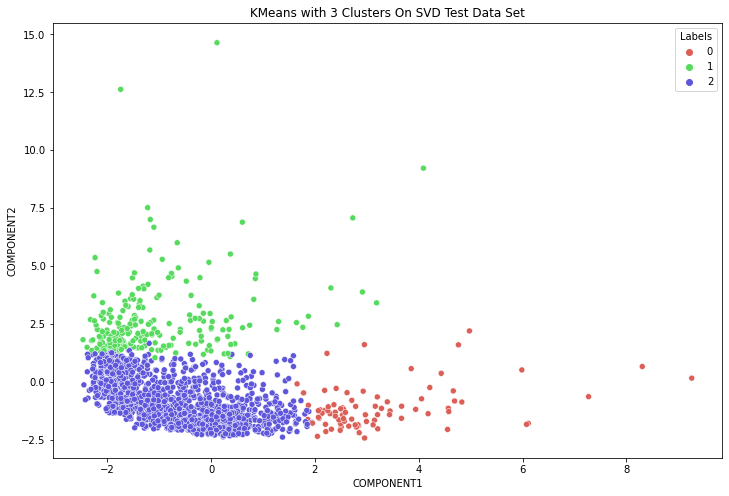

In [11]:
#svd Decompositions of Training Data
from sklearn.decomposition import TruncatedSVD

#Low-dimensional Reconstruction
rd = 5 #Number of (reduced) dimensions to use

#Transform Training Data
svd = TruncatedSVD(n_components=rd)
X_svd_train = svd.fit_transform(X_train.copy())

#Transform Testing Data and Centroids
# Predict with models
X_svd_test = svd.transform(X_test.copy())
svd_clusters = svd.transform(km4.cluster_centers_)

kmeans_svd = KMeans(n_clusters=num_clus,max_iter=1000)
kmeans_svd.fit(svd_clusters)
kmeans_svd.cluster_centers_
labels=kmeans_svd.predict(X_svd_test)

X_svd_test_km=pd.DataFrame(X_svd_test, columns=['COMPONENT1','COMPONENT2','COMPONENT3','COMPONENT4','COMPONENT5'])
X_svd_test_km['Labels'] = labels

plt.figure(figsize=(12, 8))
sns.scatterplot(X_svd_test_km['COMPONENT1'], X_svd_test_km['COMPONENT2'], hue=X_svd_test_km['Labels'], palette=sns.color_palette('hls', num_clus))
plt.title('KMeans with {} Clusters On SVD Test Data Set'.format(num_clus))
plt.show()

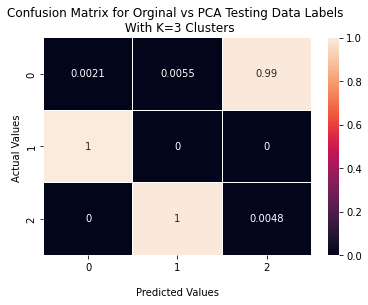

In [12]:
#Produce confusion matrix for accuracy of predicted values on pca testing data versus unaltered testing data
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(X_test_km['Labels'], X_PCA_test_km['Labels'])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax=sns.heatmap(cm_normalized, annot=True, linewidths = 0.01)
ax.set_title('Confusion Matrix for Orginal vs PCA Testing Data Labels \n With K={} Clusters'.format(num_clus))
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

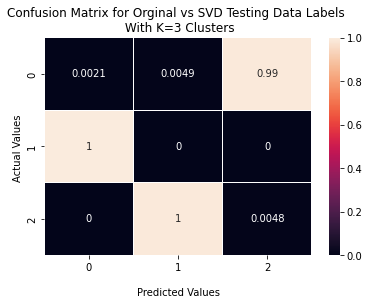

In [13]:
#Produce confusion matrix for accuracy of predicted values on SVD testing data versus unaltered testing data
cm=confusion_matrix(X_test_km['Labels'], X_svd_test_km['Labels'])
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax=sns.heatmap(cm_normalized, annot=True, linewidths = 0.01)
ax.set_title('Confusion Matrix for Orginal vs SVD Testing Data Labels \n With K={} Clusters'.format(num_clus))
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');